# Obtain Data

In [1]:
import pandas as pd
import requests

positions = {'Quarterback': 'qb', 'Running Back': 'rb', 'Wide Receiver': 'wr', 'Tight End': 'te'}
pos_dfs = {'qb': pd.DataFrame(), 'rb': pd.DataFrame(), 'wr': pd.DataFrame(), 'te': pd.DataFrame()}

In [2]:
# Collecting data for Quarterbacks
quarterbacks_df = pd.DataFrame()

for key, value in pos_dfs.items():
    for year in range(2016, 2021):
        url = f'https://www.fantasypros.com/nfl/stats/{key}.php?year={year}'
        temp_df = pd.read_html(requests.get(url).text)[0]

        temp_df.loc[:, 'Year'] = year

        pos_dfs[key] = pos_dfs[key].append([temp_df])

In [3]:
# Collecting data for Snap Counts
snap_counts_df = pd.DataFrame()

for year in range(2016, 2021):
    url = f'https://www.fantasypros.com/nfl/reports/snap-counts/?year={year}'
    temp_df = pd.read_html(requests.get(url).text)[0]

    temp_df.loc[:, 'Year'] = year

    snap_counts_df = snap_counts_df.append([temp_df])
        
snap_counts_df.head()

,Player,Pos,Team,1,2,3,4,5,6,7,...,11,12,13,14,15,16,17,TTL,AVG,Year
0,Aaron Rodgers,QB,GB,64,71,54,bye,80,70,87,...,64,71,58,48,61,56,75,1064,66.5,2016
1,Adrian Peterson,RB,MIN,38,34,0,0,0,bye,0,...,0,0,0,0,12,0,0,84,28.0,2016
2,Alex Smith,QB,KC,71,64,63,75,bye,64,52,...,53,85,49,55,58,75,58,915,61.0,2016
3,Ben Roethlisberger,QB,PIT,68,74,60,55,74,50,0,...,69,49,72,75,75,58,0,921,65.8,2016
4,Brian Hoyer,QB,CHI,0,15,65,69,66,80,20,...,0,0,0,0,0,0,0,315,52.5,2016


In [4]:
for key, value in pos_dfs.items():
    print(value.head())

  Unnamed: 0_level_0  Unnamed: 1_level_0 PASSING                            \
                Rank              Player     CMP  ATT   PCT   YDS  Y/A  TD   
0                  1  Aaron Rodgers (GB)     401  610  65.7  4428  7.3  40   
1                  2     Matt Ryan (ATL)     373  534  69.9  4944  9.3  38   
2                  3     Drew Brees (NO)     471  673  70.0  5208  7.7  37   
3                  4    Andrew Luck (FA)     346  545  63.5  4240  7.8  31   
4                  5  Kirk Cousins (MIN)     406  606  67.0  4917  8.1  25   

            RUSHING         MISC                           Year  
  INT SACKS     ATT  YDS TD   FL   G   FPTS FPTS/G    OWN        
0   7    35      67  369  4    4  16  380.0   23.8  92.5%  2016  
1   7    37      35  117  0    2  16  347.5   21.7  31.5%  2016  
2  15    27      23   20  2    4  16  332.3   20.8  36.1%  2016  
3  13    41      64  341  2    5  15  307.6   20.5   2.2%  2016  
4  12    23      34   96  4    3  16  300.7   18.8  32.5%

# Scrub Data

In [5]:
for key, value in pos_dfs.items():
    pos_dfs[key].columns = value.columns.droplevel(0)
    pos_dfs[key].columns.values[-1] = 'Year'

In [6]:
qb_col_names = [
    "Rank",
    "Player",
    "Passing_Completions",
    "Passing_Attempts",
    "Passing_Percentage",
    "Passing_Yards",
    "Passing_Yards_per_Attempt",
    "Passing_Touchdowns",
    "Passing_Interceptions",
    "Passing_Sacks",
    "Rushing_Attempts",
    "Rushing_Yards",
    "Rushing_Touchdowns",
    "Fumbles",
    "Games",
    "Fantasy_Points",
    "Fantasy_Points_per_Game",
    "OWN",
    "Year",
]
rb_col_names = [
    "Rank",
    "Player",
    "Rushing_Attempts",
    "Rushing_Yards",
    "Rushing_Yards_per_Attempt",
    "Rushing_Longest",
    "Rushing_20+",
    "Rushing_Touchdowns",
    "Receiving_Receptions",
    "Receiving_Target",
    "Receiving_Yards",
    "Receiving_Yards_per_Reception",
    "Receiving_Touchdowns",
    "Fumbles",
    "Games",
    "Fantasy_Points",
    "Fantasy_Points_per_Game",
    "OWN",
    "Year",
]
wr_col_names = [
    "Rank",
    "Player",
    "Receiving_Receptions",
    "Receiving_Targets",
    "Receiving_Yards",
    "Receiving_Yards_per_Reception",
    "Receiving_Longest",
    "Receiving_20+",
    "Receiving_Touchdowns",
    "Rushing_Attempts",
    "Rushing_Yards",
    "Rushing_Touchdowns",
    "Fumbles",
    "Games",
    "Fantasy_Points",
    "Fantasy_Points_per_Game",
    "OWN",
    "Year",
]
te_col_names = [
    "Rank",
    "Player",
    "Receiving_Receptions",
    "Receiving_Targets",
    "Receiving_Yards",
    "Receiving_Yards_per_Reception",
    "Receiving_Longest",
    "Receiving_20+",
    "Receiving_Touchdowns",
    "Rushing_Attempts",
    "Rushing_Yards",
    "Rushing_Touchdowns",
    "Fumbles",
    "Games",
    "Fantasy_Points",
    "Fantasy_Points_per_Game",
    "OWN",
    "Year",
]

In [7]:
import numpy as np
for key, value in pos_dfs.items():
    if key == 'qb':
        pos_dfs[key] = value.set_axis(qb_col_names, axis=1)
    elif key == 'rb':
        pos_dfs[key] = value.set_axis(rb_col_names, axis=1)
    elif key == 'wr':
        pos_dfs[key] = value.set_axis(wr_col_names, axis=1)
    elif key == 'te':
        pos_dfs[key] = value.set_axis(te_col_names, axis=1)

In [8]:
for key, value in pos_dfs.items():
    if key == 'qb':
        pos_dfs[key] = value.groupby(['Player', 'Year'], as_index=False).agg({
            "Passing_Completions": np.sum,
            "Passing_Attempts": np.sum,
            "Passing_Percentage": np.mean,
            "Passing_Yards": np.sum,
            "Passing_Yards_per_Attempt": np.mean,
            "Passing_Touchdowns": np.sum,
            "Passing_Interceptions": np.sum,
            "Passing_Sacks": np.sum,
            "Rushing_Attempts": np.sum,
            "Rushing_Yards": np.sum,
            "Rushing_Touchdowns": np.sum,
            "Fumbles": np.sum,
            "Games": np.sum,
            "Fantasy_Points": np.sum,
        })
    elif key == 'rb':
        pos_dfs[key] = value.groupby(['Player', 'Year'], as_index=False).agg({
            "Rushing_Attempts": np.sum,
            "Rushing_Yards": np.sum,
            "Rushing_Yards_per_Attempt": np.mean,
            "Rushing_Longest": np.max,
            "Rushing_20+": np.sum,
            "Rushing_Touchdowns": np.sum,
            "Receiving_Receptions": np.sum,
            "Receiving_Target": np.sum,
            "Receiving_Yards": np.sum,
            "Receiving_Yards_per_Reception": np.mean,
            "Receiving_Touchdowns": np.sum,
            "Fumbles": np.sum,
            "Games": np.sum,
            "Fantasy_Points": np.sum,
        })
    elif key == 'wr':
        pos_dfs[key] = value.groupby(['Player', 'Year'], as_index=False).agg({
            "Receiving_Receptions": np.sum,
            "Receiving_Targets": np.sum,
            "Receiving_Yards": np.sum,
            "Receiving_Yards_per_Reception": np.mean,
            "Receiving_Longest": np.max,
            "Receiving_20+": np.sum,
            "Receiving_Touchdowns": np.sum,
            "Rushing_Attempts": np.sum,
            "Rushing_Yards": np.sum,
            "Rushing_Touchdowns": np.sum,
            "Fumbles": np.sum,
            "Games": np.sum,
            "Fantasy_Points": np.sum,
        })
    elif key == 'te':
        pos_dfs[key] = value.groupby(['Player', 'Year'], as_index=False).agg({
            "Receiving_Receptions": np.sum,
            "Receiving_Targets": np.sum,
            "Receiving_Yards": np.sum,
            "Receiving_Yards_per_Reception": np.mean,
            "Receiving_Longest": np.max,
            "Receiving_20+": np.sum,
            "Receiving_Touchdowns": np.sum,
            "Rushing_Attempts": np.sum,
            "Rushing_Yards": np.sum,
            "Rushing_Touchdowns": np.sum,
            "Fumbles": np.sum,
            "Games": np.sum,
            "Fantasy_Points": np.sum,
        })

In [9]:
for key, value in pos_dfs.items():
    print(value.head())

              Player  Year  Passing_Completions  Passing_Attempts  \
0  AJ McCarron (ATL)  2016                    0                 0   
1  AJ McCarron (ATL)  2017                    7                14   
2  AJ McCarron (ATL)  2018                    1                 3   
3  AJ McCarron (ATL)  2019                   21                37   
4  AJ McCarron (ATL)  2020                    1                 1   

   Passing_Percentage  Passing_Yards  Passing_Yards_per_Attempt  \
0                 0.0              0                        0.0   
1                50.0             66                        4.7   
2                33.3              8                        2.7   
3                56.8            225                        6.1   
4               100.0             20                       20.0   

   Passing_Touchdowns  Passing_Interceptions  Passing_Sacks  Rushing_Attempts  \
0                   0                      0              0                 0   
1                   

In [10]:
# Adding Team name to player name column to match other dataframes
new_player_column = []
for index, row in snap_counts_df.iterrows():
    new_player_column.append(f"{row['Player']} ({row['Team']})")

snap_counts_df['Player'] = new_player_column
snap_counts_df.head()

,Player,Pos,Team,1,2,3,4,5,6,7,...,11,12,13,14,15,16,17,TTL,AVG,Year
0,Aaron Rodgers (GB),QB,GB,64,71,54,bye,80,70,87,...,64,71,58,48,61,56,75,1064,66.5,2016
1,Adrian Peterson (MIN),RB,MIN,38,34,0,0,0,bye,0,...,0,0,0,0,12,0,0,84,28.0,2016
2,Alex Smith (KC),QB,KC,71,64,63,75,bye,64,52,...,53,85,49,55,58,75,58,915,61.0,2016
3,Ben Roethlisberger (PIT),QB,PIT,68,74,60,55,74,50,0,...,69,49,72,75,75,58,0,921,65.8,2016
4,Brian Hoyer (CHI),QB,CHI,0,15,65,69,66,80,20,...,0,0,0,0,0,0,0,315,52.5,2016


In [11]:
# Dropping weekly data
snap_counts_df.drop(snap_counts_df.iloc[:, 2:20], inplace = True, axis = 1)
snap_counts_df.rename(columns = {'TTL': 'Snapcount'}, inplace=True)
snap_counts_df.loc[snap_counts_df['Snapcount'] == 'bye','Snapcount'] = np.nan
snap_counts_df['Snapcount'] = pd.to_numeric(snap_counts_df['Snapcount'])
snap_counts_df.head()

,Player,Pos,Snapcount,AVG,Year
0,Aaron Rodgers (GB),QB,1064.0,66.5,2016
1,Adrian Peterson (MIN),RB,84.0,28.0,2016
2,Alex Smith (KC),QB,915.0,61.0,2016
3,Ben Roethlisberger (PIT),QB,921.0,65.8,2016
4,Brian Hoyer (CHI),QB,315.0,52.5,2016


In [12]:
# Merging snapcount data into position dataframes
for key, value in pos_dfs.items():
    pos_dfs[key] = pd.merge(left=pos_dfs[key], right=snap_counts_df)

In [13]:
for key, value in pos_dfs.items():
    print(value.head())

               Player  Year  Passing_Completions  Passing_Attempts  \
0  Aaron Rodgers (GB)  2016                  401               610   
1  Aaron Rodgers (GB)  2017                  154               238   
2  Aaron Rodgers (GB)  2018                  372               597   
3  Aaron Rodgers (GB)  2019                  353               569   
4  Aaron Rodgers (GB)  2020                  372               526   

   Passing_Percentage  Passing_Yards  Passing_Yards_per_Attempt  \
0                65.7           4428                        7.3   
1                64.7           1675                        7.0   
2                62.3           4442                        7.4   
3                62.0           4002                        7.0   
4                70.7           4299                        8.2   

   Passing_Touchdowns  Passing_Interceptions  Passing_Sacks  Rushing_Attempts  \
0                  40                      7             35                67   
1             

In [14]:
pd.set_option('chained_assignment', None)

In [15]:
lag_features = {
    'qb': [
        'Fantasy_Points', 
        'Passing_Touchdowns', 
        'Passing_Completions', 
        'Passing_Attempts',
        'Passing_Percentage',
        'Passing_Yards_per_Attempt',
        'Snapcount',
    ],
    'rb': [
        'Fantasy_Points',
        'Rushing_Yards',
        'Rushing_Attempts',
        'Rushing_Touchdowns',
        'Rushing_Longest',
        'Receiving_Yards',
        'Snapcount',
    ],
    'wr': [
        'Fantasy_Points',
        'Receiving_Yards',
        'Receiving_Touchdowns',
        'Receiving_Receptions',
        'Receiving_Longest',
        'Receiving_Targets',
        'Receiving_Yards_per_Reception',
        'Snapcount',
    ],
    'te': [
        'Fantasy_Points',
        'Receiving_Yards',
        'Receiving_Touchdowns',
        'Receiving_Receptions',
        'Receiving_Targets',
        'Receiving_Longest',
        'Receiving_Yards_per_Reception',
        'Snapcount',
    ]
}

In [16]:
for key, value in pos_dfs.items():
    for lag in range(1, 5):
        
        shifted = pos_dfs[key].groupby('Player').shift(lag)
        
        for column in lag_features[key]:        
            pos_dfs[key][f'lag_{column}_{lag}'] = shifted[column]
            
    pos_dfs[key] = pos_dfs[key].fillna(-1)

# Explore Data

In [17]:
pd.set_option('display.max_rows', None)
for key, value in pos_dfs.items():
    print(f"{key}: {pos_dfs[key].corr()[['Fantasy_Points']].sort_values(by='Fantasy_Points', ascending=False)}\n")

qb:                                  Fantasy_Points
Fantasy_Points                         1.000000
Snapcount                              0.970211
Passing_Yards                          0.966107
Passing_Touchdowns                     0.962090
Passing_Completions                    0.958980
Passing_Attempts                       0.956813
Games                                  0.916754
Passing_Sacks                          0.849871
AVG                                    0.791483
Passing_Interceptions                  0.769405
Rushing_Attempts                       0.732584
Fumbles                                0.644247
Rushing_Yards                          0.630719
Rushing_Touchdowns                     0.626242
lag_Snapcount_1                        0.583028
lag_Fantasy_Points_1                   0.581170
lag_Passing_Attempts_1                 0.554270
lag_Passing_Completions_1              0.547821
Passing_Yards_per_Attempt              0.547700
lag_Passing_Touchdowns_1            

Text(0.5, 1, 'QB corr matrix')

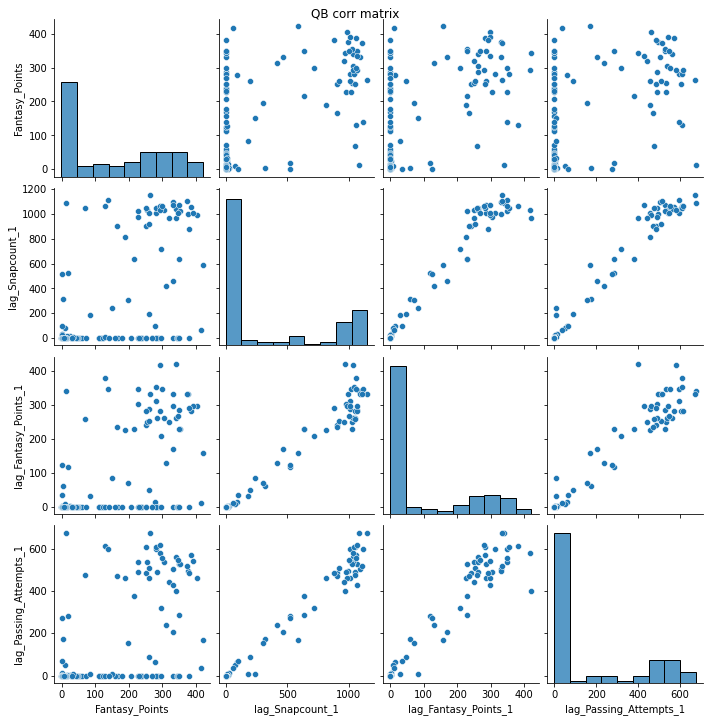

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

plot = sns.pairplot(pos_dfs['qb'][['Fantasy_Points', 'lag_Snapcount_1', 'lag_Fantasy_Points_1', 'lag_Passing_Attempts_1']])
plot.fig.suptitle("QB corr matrix", y=1)

Text(0.5, 1.0, 'QB heatmap')

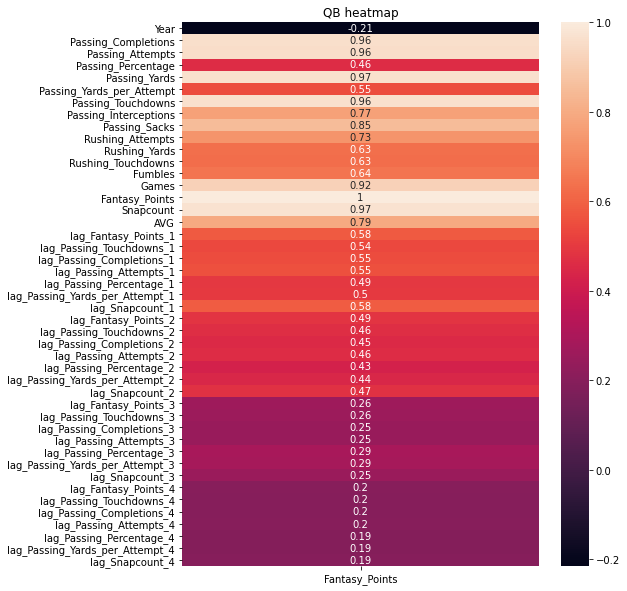

In [19]:
plt.figure(figsize=(8, 10))
plot = sns.heatmap(pos_dfs['qb'].corr()[['Fantasy_Points']], annot=True)
plot.set_title("QB heatmap")

Text(0.5, 1, 'RB corr matrix')

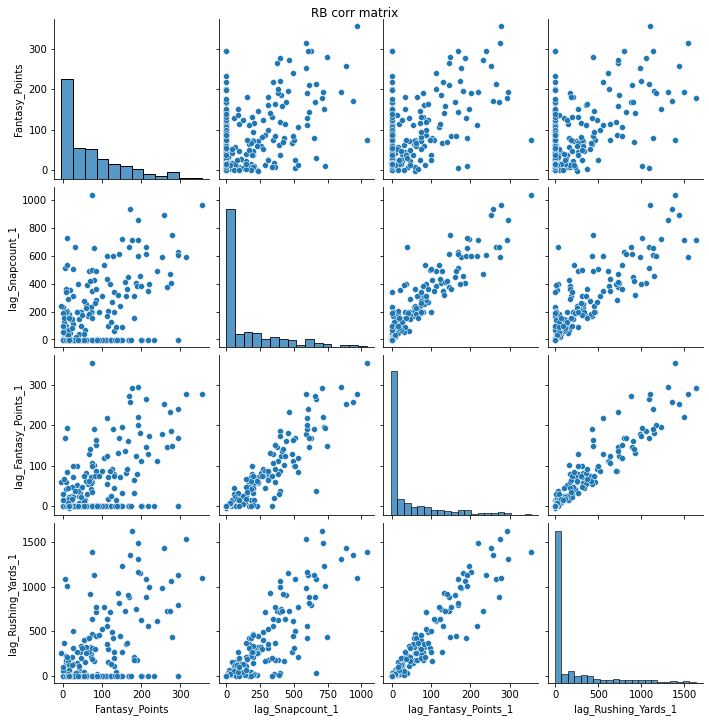

In [20]:
plot = sns.pairplot(pos_dfs['rb'][['Fantasy_Points', 'lag_Snapcount_1', 'lag_Fantasy_Points_1', 'lag_Rushing_Yards_1']])
plot.fig.suptitle("RB corr matrix", y=1)

Text(0.5, 1.0, 'RB heatmap')

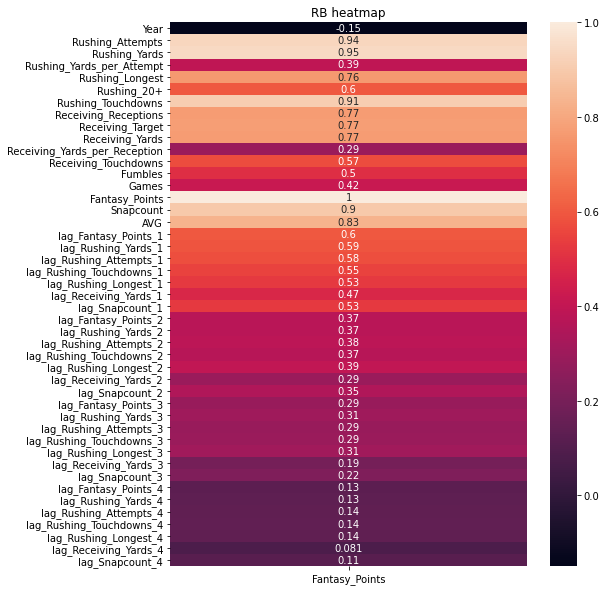

In [21]:
plt.figure(figsize=(8, 10))
plot = sns.heatmap(pos_dfs['rb'].corr()[['Fantasy_Points']], annot=True)
plot.set_title("RB heatmap")

Text(0.5, 1, 'WR corr matrix')

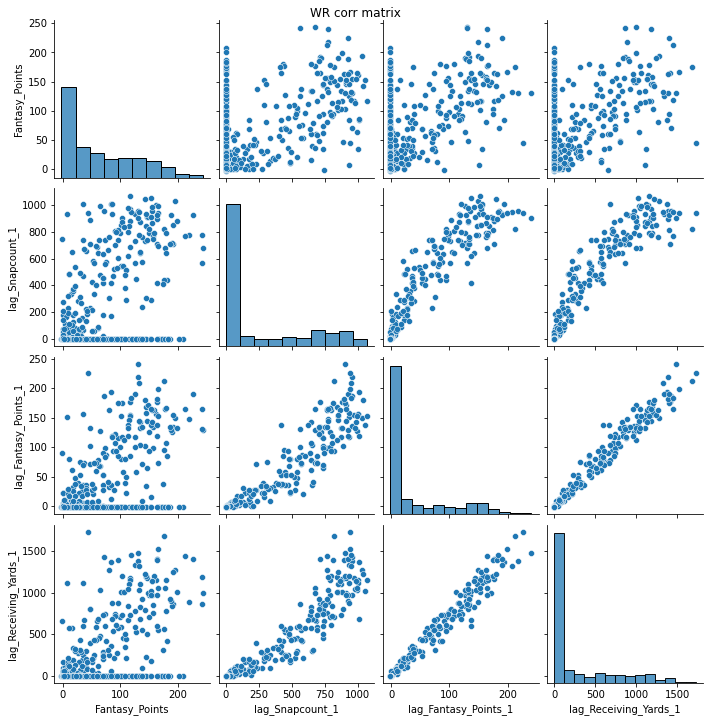

In [22]:
plot = sns.pairplot(pos_dfs['wr'][['Fantasy_Points', 'lag_Snapcount_1', 'lag_Fantasy_Points_1', 'lag_Receiving_Yards_1']])
plot.fig.suptitle("WR corr matrix", y=1)

Text(0.5, 1.0, 'WR heatmap')

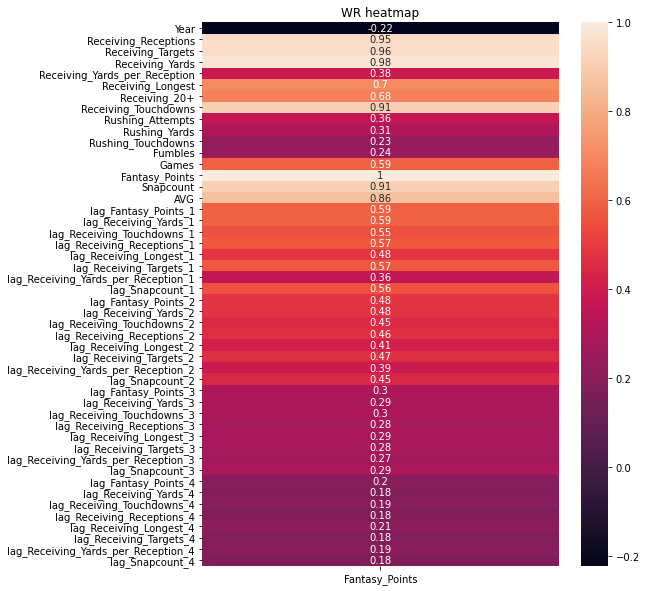

In [23]:
plt.figure(figsize=(8, 10))
plot = sns.heatmap(pos_dfs['wr'].corr()[['Fantasy_Points']], annot=True)
plot.set_title("WR heatmap")

Text(0.5, 1, 'TE corr matrix')

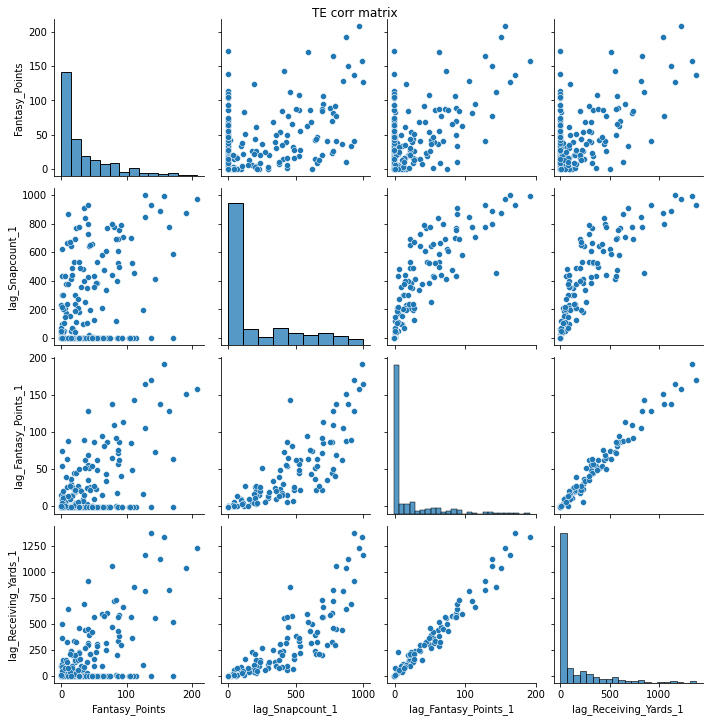

In [24]:
plot = sns.pairplot(pos_dfs['te'][['Fantasy_Points', 'lag_Snapcount_1', 'lag_Fantasy_Points_1', 'lag_Receiving_Yards_1']])
plot.fig.suptitle("TE corr matrix", y=1)

Text(0.5, 1.0, 'TE heatmap')

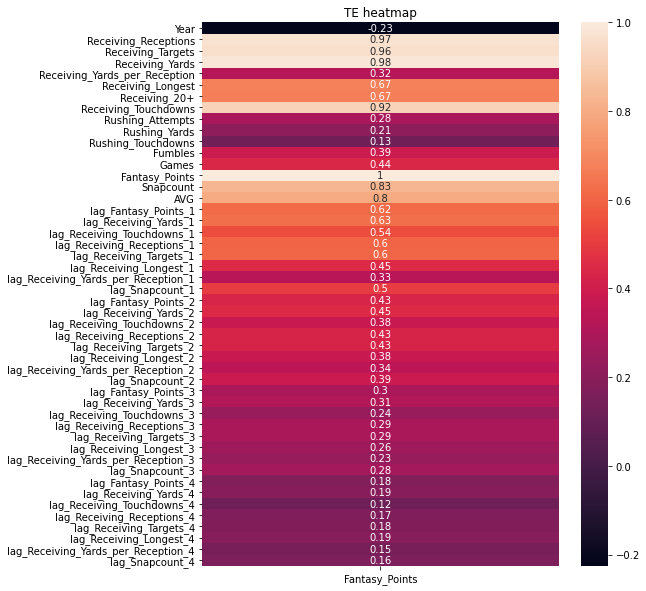

In [25]:
plt.figure(figsize=(8, 10))
plot = sns.heatmap(pos_dfs['te'].corr()[['Fantasy_Points']], annot=True)
plot.set_title("TE heatmap")

# Model Data

In [26]:
model_dfs = {'qb': pd.DataFrame(), 'rb': pd.DataFrame(), 'wr': pd.DataFrame(), 'te': pd.DataFrame()}

for key, value in pos_dfs.items():
    model_dfs[key] = pos_dfs[key].loc[(pos_dfs[key]['Year'] < 2020) & (pos_dfs[key]['Snapcount'] > 50)]

In [27]:
X_qb = model_dfs['qb'][[
    'lag_Snapcount_1',
    'lag_Passing_Completions_1',
    'lag_Fantasy_Points_1',
]].values

y_qb = model_dfs['qb']['Fantasy_Points'].values

X_qb.shape, y_qb.shape

((55, 3), (55,))

In [28]:
X_rb = model_dfs['rb'][[
    'lag_Snapcount_1',
    'lag_Rushing_Yards_1',
    'lag_Fantasy_Points_1',
]].values

y_rb = model_dfs['rb']['Fantasy_Points'].values

X_rb.shape, y_rb.shape

((121, 3), (121,))

In [29]:
X_wr = model_dfs['wr'][[
    'lag_Snapcount_1',
    'lag_Receiving_Yards_1',
    'lag_Fantasy_Points_1',
]].values

y_wr = model_dfs['wr']['Fantasy_Points'].values

X_wr.shape, y_wr.shape

((185, 3), (185,))

In [30]:
X_te = model_dfs['te'][[
    'lag_Snapcount_1',
    'lag_Receiving_Yards_1',
    'lag_Fantasy_Points_1',
]].values

y_te = model_dfs['te']['Fantasy_Points'].values

X_te.shape, y_te.shape

((102, 3), (102,))

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X_qb_train, X_qb_test, y_qb_train, y_qb_test = train_test_split(X_qb, y_qb, test_size=0.2, random_state=10)
X_rb_train, X_rb_test, y_rb_train, y_rb_test = train_test_split(X_rb, y_rb, test_size=0.2, random_state=10)
X_wr_train, X_wr_test, y_wr_train, y_wr_test = train_test_split(X_wr, y_wr, test_size=0.2, random_state=10)
X_te_train, X_te_test, y_te_train, y_te_test = train_test_split(X_te, y_te, test_size=0.2, random_state=10)

lr_qb = LinearRegression()
lr_rb = LinearRegression()
lr_wr = LinearRegression()
lr_te = LinearRegression()

lr_qb.fit(X_qb_train, y_qb_train)
y_qb_pred = lr_qb.predict(X_qb_test)
print(mean_absolute_error(y_qb_pred, y_qb_test))

lr_rb.fit(X_rb_train, y_rb_train)
y_rb_pred = lr_rb.predict(X_rb_test)
print(mean_absolute_error(y_rb_pred, y_rb_test))

lr_wr.fit(X_wr_train, y_wr_train)
y_wr_pred = lr_wr.predict(X_wr_test)
print(mean_absolute_error(y_wr_pred, y_wr_test))

lr_te.fit(X_te_train, y_te_train)
y_te_pred = lr_te.predict(X_te_test)
print(mean_absolute_error(y_te_pred, y_te_test))

74.75135929118704
67.90570214640131
41.383864992662936
27.60802076435091


In [32]:
qb_df_pred = pos_dfs['qb'].loc[
    (pos_dfs['qb']['Snapcount'] > 50) & (pos_dfs['qb']['Year'] == 2020)
    ,[
    'Player', 
    'Snapcount', 
    'Passing_Completions', 
    'Fantasy_Points'
]]

qb_df_pred['2021_Predicted_Fantasy_Points'] = lr_qb.predict(qb_df_pred[[
        'Snapcount', 
        'Passing_Completions', 
        'Fantasy_Points'
    ]].values)

qb_df_pred.sort_values(by='2021_Predicted_Fantasy_Points', ascending=False).head(100)

,Player,Snapcount,Passing_Completions,Fantasy_Points,2021_Predicted_Fantasy_Points
7,Baker Mayfield (CLE),1046.0,305,255.8,339.680356
80,Lamar Jackson (BAL),917.0,242,341.7,315.256662
20,Cam Newton (NE),876.0,242,269.3,312.285574
115,Ryan Tannehill (TEN),1052.0,315,350.3,310.795084
74,Kirk Cousins (MIN),1082.0,349,319.2,300.890938
48,Drew Lock (DEN),835.0,254,196.4,298.131630
34,Daniel Jones (NYG),868.0,280,190.2,291.329499
121,Taysom Hill (NO),472.0,88,150.5,287.004950
106,Philip Rivers (IND),1044.0,369,251.0,279.561827
37,Derek Carr (LV),1007.0,348,281.0,274.044373


In [33]:
rb_df_pred = pos_dfs['rb'].loc[
    (pos_dfs['rb']['Snapcount'] > 50) & (pos_dfs['rb']['Year'] == 2020)
    ,[
    'Player', 
    'Snapcount', 
    'Rushing_Yards', 
    'Fantasy_Points'
]]

rb_df_pred['2021_Predicted_Fantasy_Points'] = lr_rb.predict(rb_df_pred[[
        'Snapcount', 
        'Rushing_Yards', 
        'Fantasy_Points'
    ]].values)

rb_df_pred.sort_values(by='2021_Predicted_Fantasy_Points', ascending=False).head(100)

,Player,Snapcount,Rushing_Yards,Fantasy_Points,2021_Predicted_Fantasy_Points
102,Derrick Henry (TEN),705.0,2027,314.1,281.606469
81,Dalvin Cook (MIN),669.0,1557,293.8,252.496062
16,Alvin Kamara (NO),658.0,932,294.8,224.100203
95,David Montgomery (CHI),707.0,1070,210.8,211.809268
119,Ezekiel Elliott (DAL),777.0,979,171.7,202.885248
157,Jonathan Taylor (IND),511.0,1169,216.8,202.429796
137,James Robinson (JAC),617.0,1070,201.4,202.257611
165,Josh Jacobs (LV),619.0,1065,198.3,201.370149
4,Aaron Jones (GB),539.0,1104,211.9,200.435798
198,Melvin Gordon III (DEN),627.0,986,166.4,190.025827


In [34]:
wr_df_pred = pos_dfs['wr'].loc[
    (pos_dfs['wr']['Snapcount'] > 50) & (pos_dfs['wr']['Year'] == 2020)
    ,[
    'Player', 
    'Snapcount', 
    'Receiving_Yards', 
    'Fantasy_Points'
]]

wr_df_pred['2021_Predicted_Fantasy_Points'] = lr_wr.predict(wr_df_pred[[
        'Snapcount', 
        'Receiving_Yards', 
        'Fantasy_Points'
    ]].values)

wr_df_pred.sort_values(by='2021_Predicted_Fantasy_Points', ascending=False).head(100)

,Player,Snapcount,Receiving_Yards,Fantasy_Points,2021_Predicted_Fantasy_Points
342,Stefon Diggs (BUF),966.0,1535,201.6,172.981428
106,Davante Adams (GB),773.0,1374,243.4,169.844110
398,Tyreek Hill (KC),849.0,1276,241.9,163.936507
214,Justin Jefferson (MIN),886.0,1400,186.2,163.627391
48,Calvin Ridley (ATL),822.0,1374,191.5,163.023123
107,DeAndre Hopkins (ARI),1042.0,1407,172.8,161.869956
89,D.K. Metcalf (SEA),980.0,1303,188.3,158.190941
15,Allen Robinson II (CHI),861.0,1250,160.9,152.005105
87,D.J. Moore (CAR),836.0,1193,145.5,146.885201
36,Brandin Cooks (HOU),802.0,1150,151.0,145.269726


In [35]:
te_df_pred = pos_dfs['te'].loc[
    (pos_dfs['te']['Snapcount'] > 50) & (pos_dfs['te']['Year'] == 2020)
    ,[
    'Player', 
    'Snapcount', 
    'Receiving_Yards', 
    'Fantasy_Points'
]]

te_df_pred['2021_Predicted_Fantasy_Points'] = lr_te.predict(te_df_pred[[
        'Snapcount', 
        'Receiving_Yards', 
        'Fantasy_Points'
    ]].values)

te_df_pred.sort_values(by='2021_Predicted_Fantasy_Points', ascending=False).head(100)

,Player,Snapcount,Receiving_Yards,Fantasy_Points,2021_Predicted_Fantasy_Points
204,Travis Kelce (KC),857.0,1416,207.8,190.405047
51,Darren Waller (LV),993.0,1196,171.6,154.284148
142,Mark Andrews (BAL),598.0,701,112.1,105.462807
152,Mike Gesicki (MIA),623.0,703,106.3,103.841388
194,T.J. Hockenson (DET),748.0,723,108.3,101.183285
84,George Kittle (SF),443.0,634,77.1,99.381614
166,Noah Fant (DEN),733.0,673,87.3,93.130666
181,Robert Tonyan (GB),637.0,586,124.6,92.280769
178,Rob Gronkowski (TB),808.0,623,104.3,86.566303
75,Evan Engram (NYG),837.0,654,78.0,85.285428
